In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('city_day.csv',parse_dates=['Date'], index_col='Date')

In [3]:
df_delhi = df[df['City']== 'Delhi']

In [4]:
df_delhi.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Delhi,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
2015-01-02,Delhi,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
2015-01-03,Delhi,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
2015-01-04,Delhi,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
2015-01-05,Delhi,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


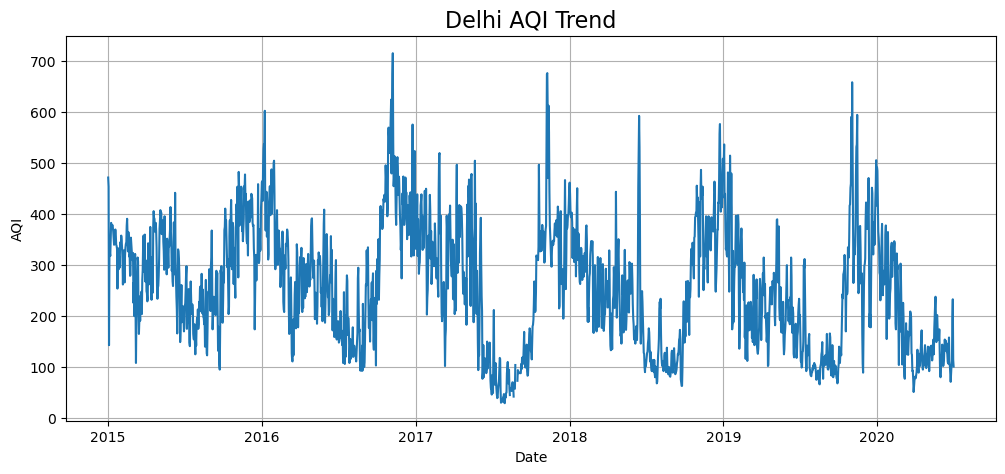

In [5]:
plt.figure(figsize=(12,5))
plt.plot(df_delhi['AQI'])
plt.title('Delhi AQI Trend',fontsize=16)
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)
plt.show()

In [6]:
df_delhi['MA_7Day'] = df_delhi['AQI'].rolling(window=7).mean()

C:\Users\dkglt\AppData\Local\Temp\ipykernel_12560\1957031328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delhi['MA_7Day'] = df_delhi['AQI'].rolling(window=7).mean()


In [7]:
df_delhi.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,MA_7Day
Date,,,,,,,,,,,,,,,,
2015-01-01,Delhi,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe,NaN
2015-01-02,Delhi,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe,NaN
2015-01-03,Delhi,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate,NaN
2015-01-04,Delhi,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor,NaN
2015-01-05,Delhi,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor,NaN


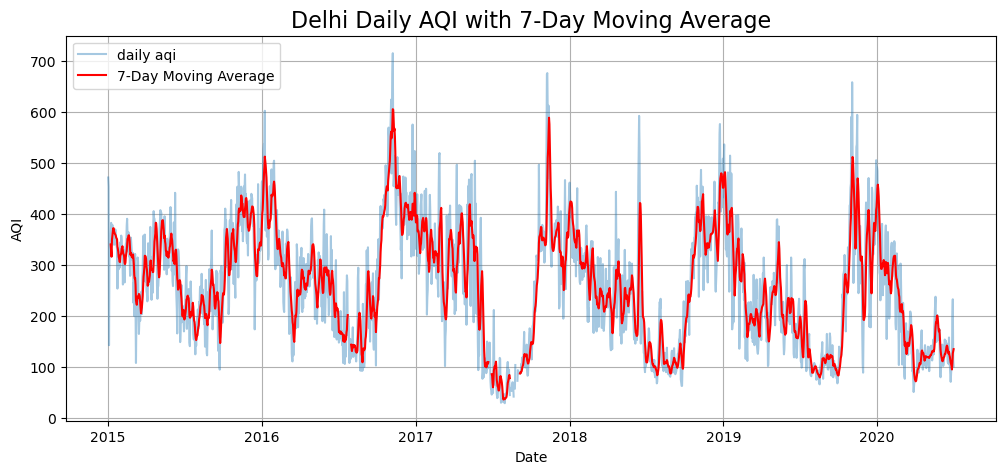

In [16]:
plt.figure(figsize=(12,5))
plt.plot(df_delhi['AQI'],label='daily aqi', alpha=0.4)
plt.plot(df_delhi['MA_7Day'],label='7-Day Moving Average', color='red')
plt.title('Delhi Daily AQI with 7-Day Moving Average', fontsize=16)
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

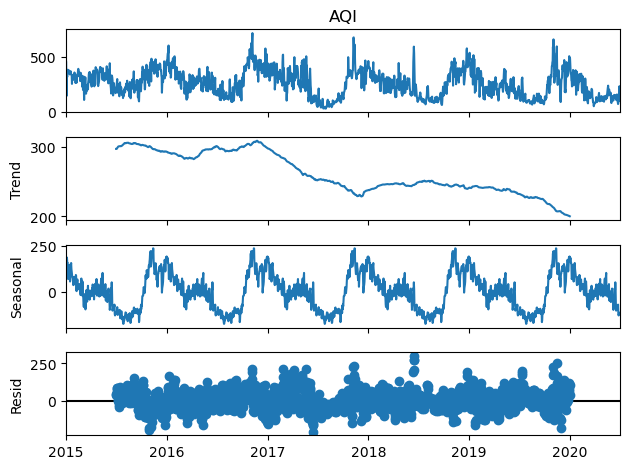

In [30]:
df_delhi_clean = df_delhi.dropna(subset=['AQI'])

result = seasonal_decompose(df_delhi_clean['AQI'], model='additive', period=365)
result.plot()
plt.show()


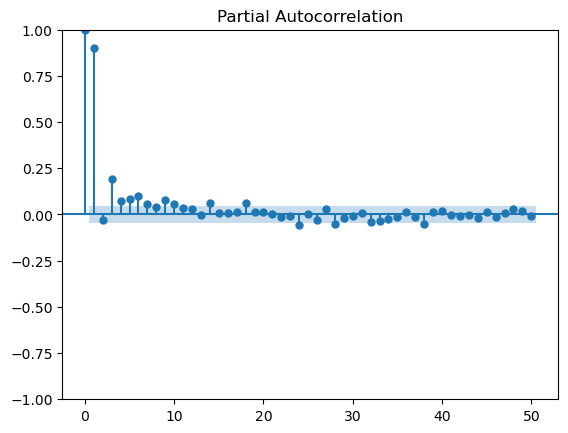

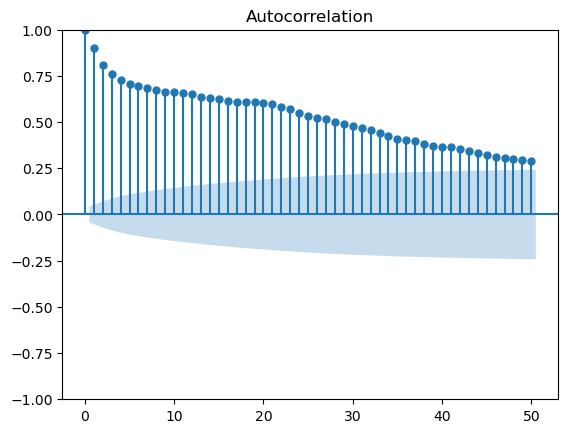

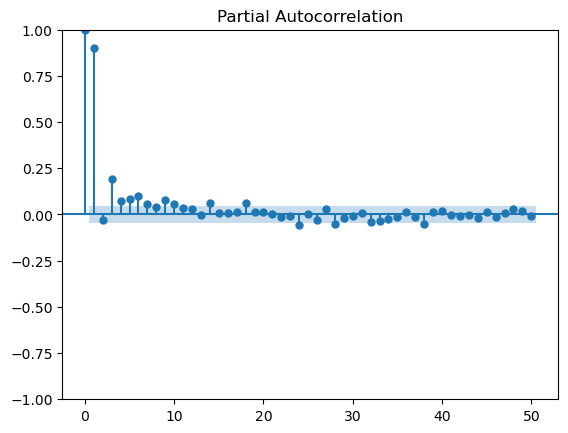

In [32]:
plot_acf(df_delhi_clean['AQI'], lags=50)
plot_pacf(df_delhi_clean['AQI'], lags=50)
